In [59]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [60]:
import numpy as np
import pandas as pd

In [61]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [62]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [63]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [64]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [65]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [66]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [67]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

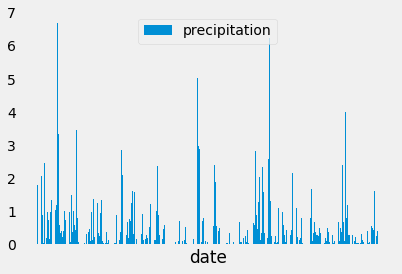

In [68]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

last_12 = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= one_year_ago)

# Save the query results as a Pandas DataFrame and set the index to the date column
stmt = last_12.statement
df = pd.read_sql_query(stmt, session.bind)
df.set_index('date', inplace=True)

# Sort the dataframe by date
df.sort_values(by=['date'])
df.head()

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(df.index, df['prcp'])
plt.xlabel("date")
plt.xticks([])
plt.grid()
plt.legend(["precipitation"], loc = 'upper center')
plt.show()



![precipitation](Images/precipitation.png)

In [69]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = pd.DataFrame(df['prcp'].describe())
summary = summary.rename(columns = {'prcp': 'precipitation'})
summary

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [70]:
# Design a query to show how many stations are available in this dataset?
stations_available = session.query(func.count(Station.station)).all()
stations_available

[(9)]

In [71]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [72]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperatre recorded, and average temperature most active station?
most_active_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
most_active_temp


[(54.0, 85.0, 71.66378066378067)]

Text(0,0.5,'Frequency')

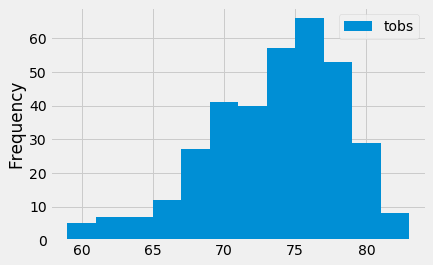

In [73]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = session.query(Measurement).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= one_year_ago)

stmt2 = most_active_station.statement
most_active_df = pd.read_sql_query(stmt2, session.bind)

plt.hist(most_active_df["tobs"], bins=12)
labels = ["tobs"]
plt.legend(labels)
plt.ylabel("Frequency")


In [74]:
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
date_tobs= session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= one_year_ago)
only_tobs = list(np.ravel(date_tobs))
only_tobs

![precipitation](Images/station-histogram.png)

In [75]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [76]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [77]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [78]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [79]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [80]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [81]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [82]:
# Plot the daily normals as an area plot with `stacked=False`
